In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import numpy as np
import seaborn as sns
import pandas as pd

# Decision Trees

In [2]:
iris=datasets.load_iris()

In [3]:
X=iris.data
Y=iris.target

In [4]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, Y)

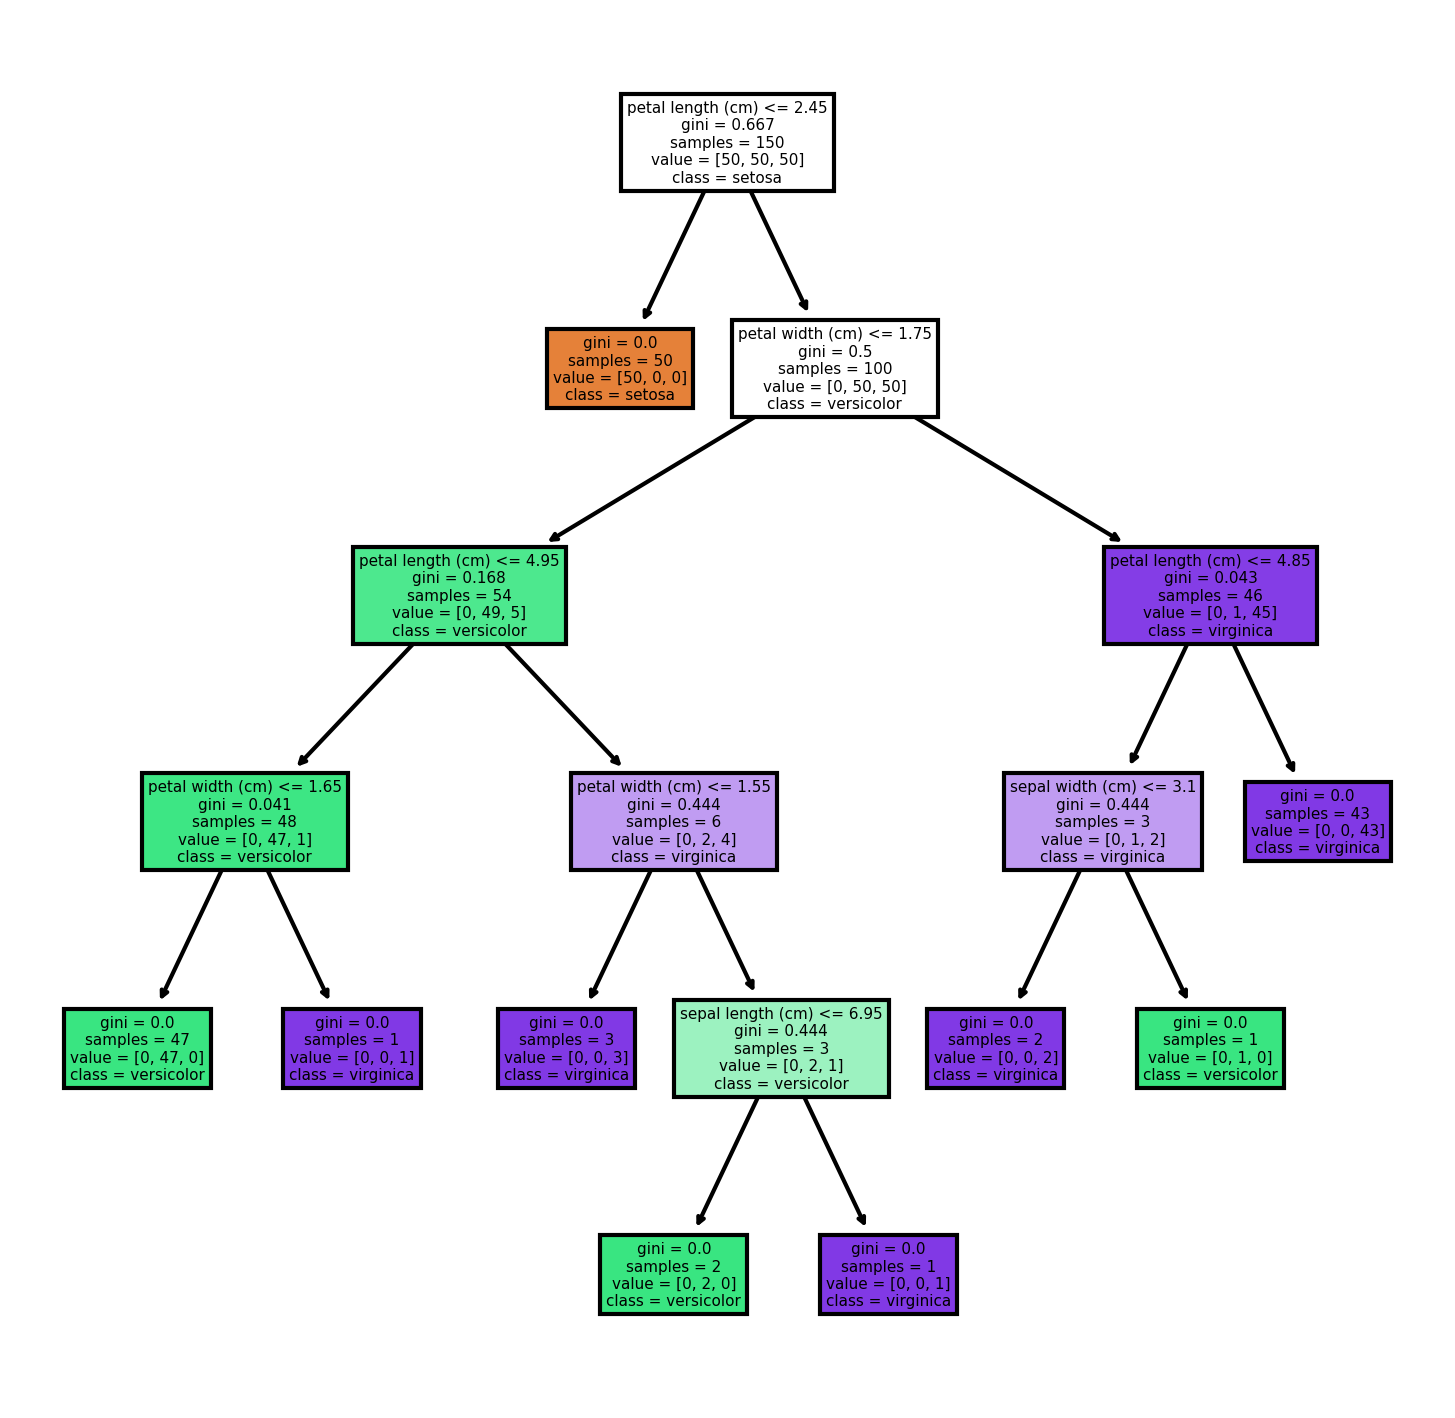

In [5]:
fig,ax=plt.subplots(figsize=(6,6), dpi=300)

tree.plot_tree(clf,
                feature_names=iris.feature_names,
                class_names=list(iris.target_names), filled=True)

fig.savefig('dt.svg')

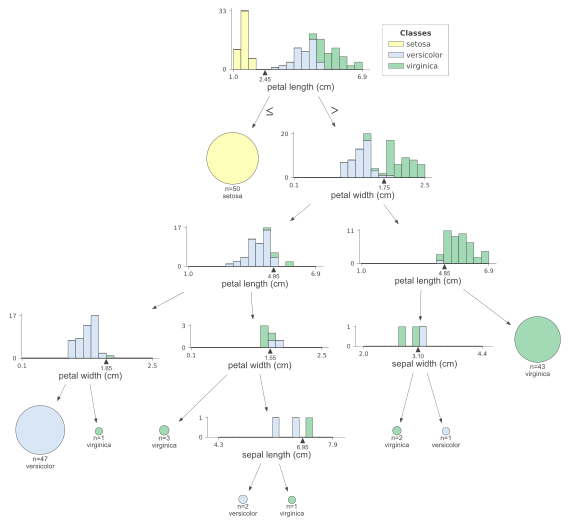

In [6]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

#import graphviz
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf, X, Y,
                target_name="Classes",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz


In [7]:
viz.save("decision_tree.svg")

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


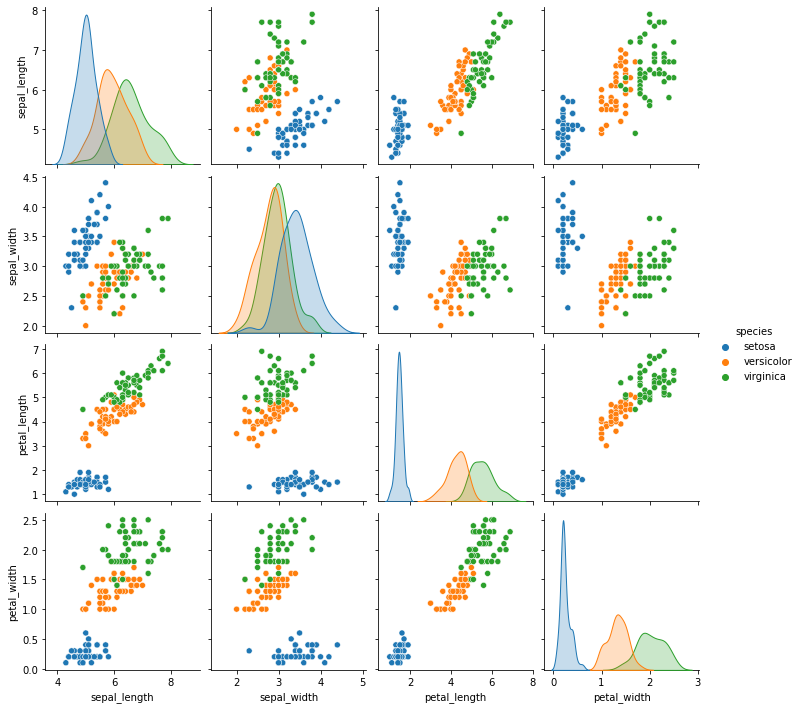

In [8]:
iris = sns.load_dataset("iris")
print(iris.head())
y = iris.species
X = iris.drop('species',axis=1)
sns.pairplot(iris, hue="species")

In [9]:
df=iris[iris.species!='virginica']
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


# Support Vector Machine (SVM)

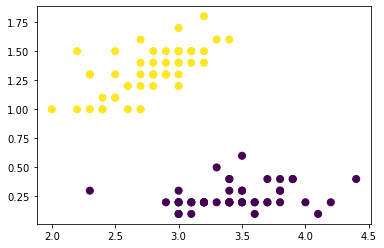

In [10]:
df=df.replace('setosa', 0)
df=df.replace('versicolor', 1)
X=df[['sepal_width', 'petal_width']]# .iloc[:,[1,3]]
y=df['species']
plt.scatter(X.sepal_width, X.petal_width, c=y, s=50)


In [11]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)


SVC(C=10000000000.0, kernel='linear')

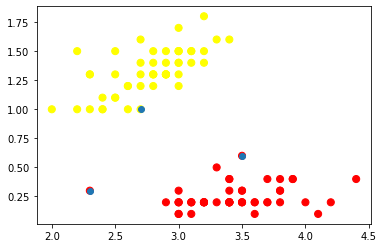

In [12]:
model.support_vectors_

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

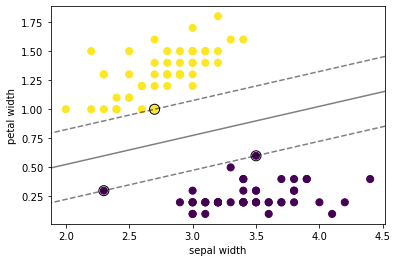

In [13]:
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.set(xlabel='sepal width', ylabel='petal width')
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
#plt.legend()

plt.savefig("svm.svg", format="svg")
plt.show()



C:\Users\test\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


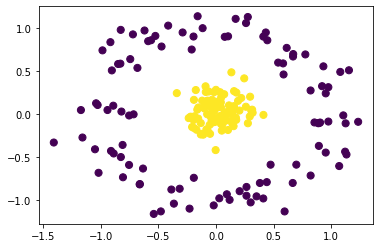

In [14]:
from sklearn.datasets.samples_generator import make_circles
x,y =make_circles(200, factor=0.1,noise=0.14)

plt.scatter(x[:,0], x[:,1], c=y, s=50)
plt.savefig("svm-kernel1.svg", format="svg")

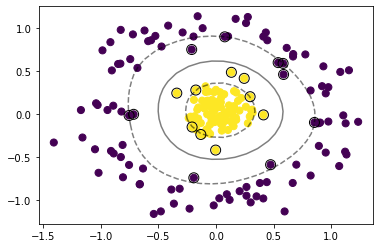

In [15]:
model=SVC(kernel='rbf').fit(x, y)

ax = plt.gca()
plt.scatter(x[:, 0], x[:, 1], c=y, s=50)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
#ax.set(xlabel='sepal width', ylabel='petal width')
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
#plt.legend()

plt.savefig("svm-kernel2.svg", format="svg")
plt.show()


# Linear and Logistic Regression

In [16]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

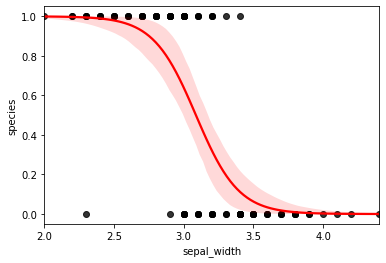

In [17]:
sns.regplot(x=df['sepal_width'], y=df.species, data=df, logistic=True, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.savefig("logistic.svg", format="svg")


In [18]:
tips = sns.load_dataset("tips")

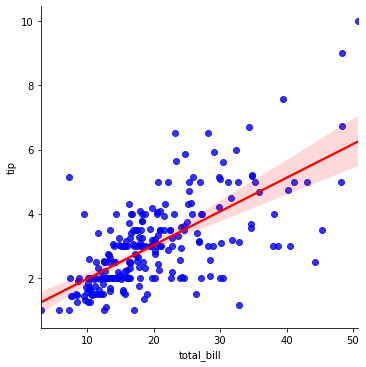

In [19]:
sns.lmplot(x="total_bill", y="tip", data=tips, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
ax.set(xlabel='Total bill', ylabel='Tip')
plt.savefig("regression.svg", format="svg")


# Agglomerative Hierarchical Clustering

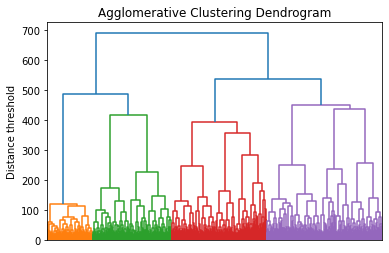

In [20]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
#from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, show_leaf_counts=False, no_labels=True, **kwargs)


iris = datasets.load_digits()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering( linkage='ward',distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Agglomerative Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=10)
#plt.xlabel("Number of points in node")
plt.ylabel("Distance threshold")
plt.savefig("dendrogram.svg", format="svg")

plt.show()

In [21]:
iris

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

# Persistent homology (Tpological Data Analysis)

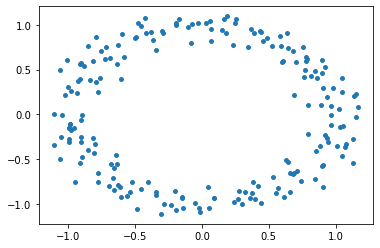

In [22]:
x,y =make_circles(200, factor=0.9999,noise=0.1)

z=[]

for i,a in enumerate(x):
    if y[i]==0:
        #print(a)
        z.append([a[0],a[1]])

#x=z        

plt.scatter(x[:,0], x[:,1],  s=15)
plt.savefig("circle-points.svg", format="svg")

In [23]:
x

array([[ 0.89368735,  0.46352299],
       [ 0.8527717 , -0.40654554],
       [ 0.58580382,  0.87499578],
       [ 1.043486  , -0.46305454],
       [-0.68672032,  0.63332612],
       [ 1.1506018 , -0.03263076],
       [-0.97932436,  0.25599943],
       [ 1.04703102,  0.41076245],
       [-0.07869849,  0.79878937],
       [ 0.3848046 , -0.75586669],
       [-0.23422821, -1.0091134 ],
       [-0.42795619,  1.08187448],
       [ 0.77681925,  0.59652365],
       [-0.6322142 , -0.55152537],
       [ 0.36729966,  0.95778353],
       [ 0.0702678 ,  0.9486089 ],
       [ 0.93730478,  0.19424526],
       [ 1.1284489 , -0.54001573],
       [ 0.96769143,  0.09881903],
       [-0.56113712, -0.90720977],
       [ 0.94300746, -0.31361476],
       [-0.99556916, -0.14637447],
       [ 0.52582648,  0.76625592],
       [-1.00575236,  0.61198017],
       [ 0.91951106,  0.53074276],
       [ 0.08671584, -0.93854385],
       [ 0.43745374,  0.93614859],
       [-0.83584994,  0.38287598],
       [ 0.27801222,

In [24]:
import gudhi as gd

In [25]:
epsilon=0.3

In [26]:
skeleton = gd.RipsComplex(points = x, max_edge_length = epsilon)
Rips_simplex_tree_sample = skeleton.create_simplex_tree(max_dimension = 2) 

In [27]:
Rips_simplex_tree_sample.dimension()

2

In [28]:
Rips_simplex_tree_sample.num_vertices()

200

In [29]:
Rips_simplex_tree_sample.num_simplices()

7289

In [30]:
rips_generator = Rips_simplex_tree_sample.get_filtration()

In [31]:
points=x
st=Rips_simplex_tree_sample
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 ])

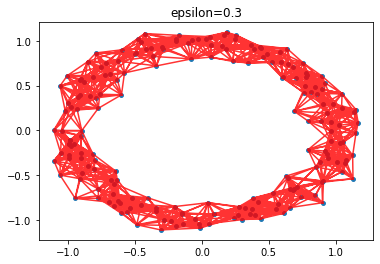

In [32]:
# Visualization with matplotlib
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#from matplotlib.widgets import Slider

fig = plt.figure()
#ax = fig.gca(projection = 'polar')
l = plt.triplot(points[:, 0], points[:, 1], triangles = triangles, color='red', alpha=0.8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

plt.title("epsilon="+str(epsilon))
plt.scatter(x[:,0], x[:,1],  s=15)
plt.savefig("circle-complex.svg", format="svg")

plt.show()

In [33]:
BarCodes=Rips_simplex_tree_sample.persistence()

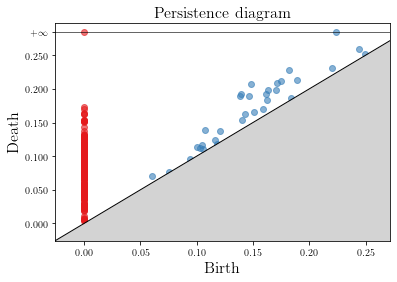

In [34]:
gd.plot_persistence_diagram(BarCodes);
plt.savefig("persistent-diag.svg", format="svg")

# Time Series Analysis

In [35]:
from pylab import rcParams   
import statsmodels.api as sm
rcParams['figure.figsize'] = 11, 9   



In [36]:
data=pd.read_csv('C:/Code/TS/monthly-sunspots.csv', parse_dates=True, index_col = "Month")

In [37]:
print(data)

            Sunspots
Month               
1749-01-01      58.0
1749-02-01      62.6
1749-03-01      70.0
1749-04-01      55.7
1749-05-01      85.0
...              ...
1983-08-01      71.8
1983-09-01      50.3
1983-10-01      55.8
1983-11-01      33.3
1983-12-01      33.4

[2820 rows x 1 columns]


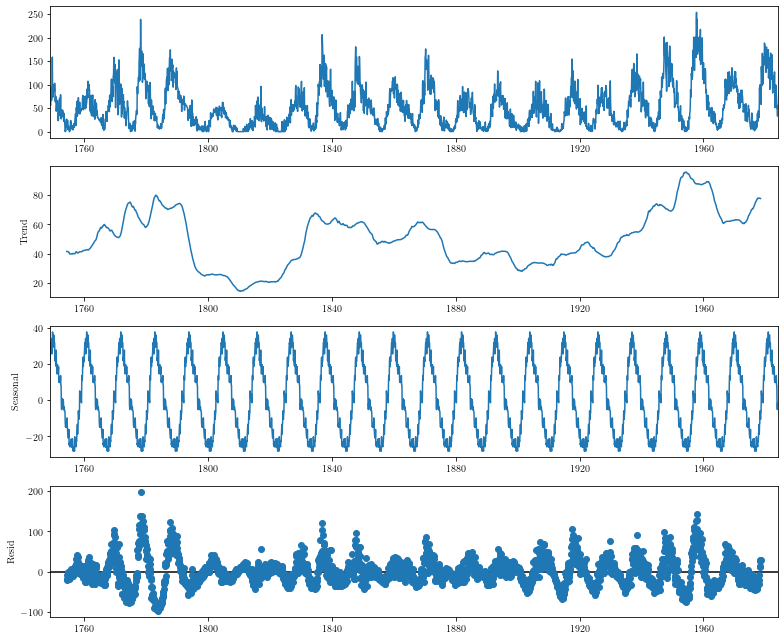

In [38]:
decomposition = sm.tsa.seasonal_decompose(data, model='Additive', period=11*12)   
fig = decomposition.plot()  
plt.savefig("sunspot-timeseries.svg", format="svg")
plt.show()

# Diagram of a Neural Network

In [39]:


import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'


import keras;
from keras.models import Sequential;
from keras.layers import Dense;

network = Sequential();
        #Hidden Layer#1
network.add(Dense(units=6,
                  activation='relu',
                  kernel_initializer='uniform',
                  input_dim=4));

        #Hidden Layer#2
network.add(Dense(units=6,
                  activation='relu',
                  kernel_initializer='uniform'));

        #Exit Layer
network.add(Dense(units=1,
                  activation='sigmoid',
                  kernel_initializer='uniform'));

from ann_visualizer.visualize import ann_viz;

ann_viz(network, title="");